In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/home/snuffells_linux/documents/Compt_cient_act/Segundo_Parcial/Salary_data.csv')

In [3]:
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [4]:
y = df['Salary']
X = df['Experience Years']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9999)

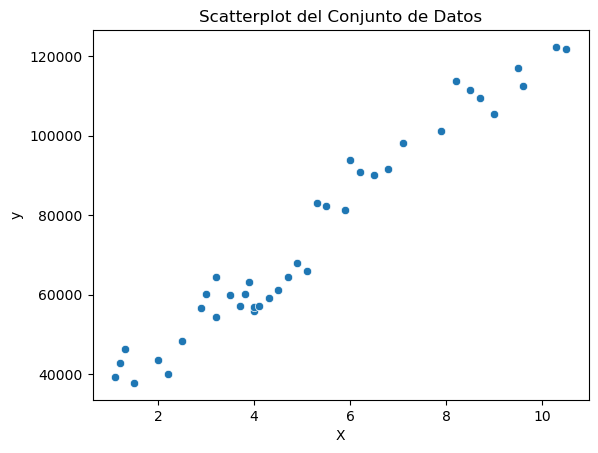

In [5]:
ax = plt.subplot()

sns.scatterplot(x = X, y = y, ax = ax)

ax.set_xlabel('X')
ax.set_ylabel('y')

ax.set_title('Scatterplot del Conjunto de Datos')

plt.show()

In [6]:
X_train = np.array(X_train)
X_train =X_train.reshape(32,1)
Y_train = np.array(y_train)
Y_train = Y_train.reshape(32,1)


In [7]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [8]:
m = lr.coef_.item()
b0 = lr.intercept_
print(f' Y = {m} x + {b0}')
print(m*1.1+b0)
lr.predict(np.array([1.1]).reshape(1, -1))

 Y = 9440.298079126647 x + [25430.9671764]
[35815.29506344]


array([[35815.29506344]])

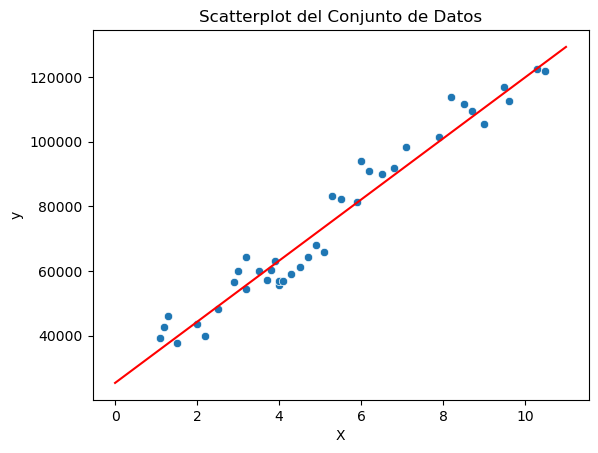

In [9]:
ax = plt.subplot()

sns.scatterplot(x = X, y = y, ax = ax)
xline = list(range(12))
y_line = np.array(m*np.array(xline)+b0)
ax.plot(xline, y_line, color='red', label='Línea')

ax.set_xlabel('X')
ax.set_ylabel('y')

ax.set_title('Scatterplot del Conjunto de Datos')

plt.show()

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

In [11]:
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

In [12]:
# np.array(y_test).shape
y_predict_test = lr.predict(np.array(y_test).reshape(8,1))
y_predict_train = lr.predict(np.array(Y_train))
print(r2_score(y_test, y_predict_test), r2_score(Y_train, y_predict_train))

-1426222901.837587 -773376992.4700587


In [13]:
test_data = {
    'R2': round(r2_score(y_test, y_predict_test),4),
    'MAE': int(mae(y_test, y_predict_test)),
    'MSE' : int(mse(y_test, y_predict_test)),
    'MAPE': int(mape(y_test, y_predict_test)),
    'RMSE': int(rmse(y_test, y_predict_test))
}
test_data

{'R2': -1426222901.8376,
 'MAE': 771898073,
 'MSE': 635530072297190528,
 'MAPE': 9439,
 'RMSE': 797201400}

In [14]:
train_data = {
    'R2': round(r2_score(y_train, y_predict_train),4),
    'MAE': int(mae(y_test, y_predict_train)),
    'MSE' : int(mse(y_test, y_predict_train)),
    'MAPE': int(mape(y_test, y_predict_train)),
    'RMSE': int(rmse(y_test, y_predict_train))
}
train_data

ValueError: Found input variables with inconsistent numbers of samples: [8, 32]